In [1]:
import os
import os.path
import pandas as pd
import sys
sys.path.append('..')
from src.utils.data import writePandas, getPandas, getConfig
os.chdir('..')
os.getcwd()
import seaborn as sns
import matplotlib.pyplot as plt
data = getPandas('pat_data')
conf = getConfig('data')
used_inds = conf['indices']['pat']['train'] + conf['indices']['pat']['test']
used_inds = conf['indices']['pat']['train']
train_inds = conf['indices']['pat']['train']
test_inds = conf['indices']['pat']['test']
mednet_fe = getPandas('data_radiomic_full_CAT_0.8')
mednet_fe = mednet_fe.drop(['KEY'], axis=1)
train_data = data.iloc[train_inds]
train_good_inds = train_data[train_data['CAT'] == 1].index
train_bad_inds = train_data[train_data['CAT'] == 0].index
train_good_mednet = mednet_fe.iloc[train_good_inds]
train_bad_mednet = mednet_fe.iloc[train_bad_inds]
test_data = data.iloc[test_inds]
test_good_inds = test_data[test_data['CAT'] == 1].index
test_bad_inds = test_data[test_data['CAT'] == 0].index
test_good_mednet = mednet_fe.iloc[test_good_inds]
test_bad_mednet = mednet_fe.iloc[test_bad_inds]
from scipy.stats import pearsonr, ttest_ind

In [2]:
cols = train_good_mednet.columns[1:]
from statsmodels.stats.multitest import fdrcorrection, multipletests
ps = []
for col in cols:
    train_good_fe = train_good_mednet[col].values
    train_bad_fe = train_bad_mednet[col].values
    test_good_fe = test_good_mednet[col].values
    test_bad_fe = test_bad_mednet[col].values
    p = ttest_ind(train_good_fe, train_bad_fe)[1]
    p_test = ttest_ind(test_good_fe, test_bad_fe)[1]
    ps.append(p)
    #if p < 0.05 and p_test < 0.05:
        #print(col, p, p_test)
    #if col == 'resnet_13074' or col == 'resnet_12889' or col == 'resnet_810':
        #print(col, p, p_test)
fdr = fdrcorrection(ps)
print('Texture feature counts (p<0.05): before FDR {}, after FDR {}'.format(sum([p < 0.05 for p in ps]), sum(fdr[1] < 0.05)))

Texture feature counts (p<0.05): before FDR 9, after FDR 0


In [3]:
import numpy as np
ps = np.array(ps)
print(ps.shape)
ps = ps[~np.isnan(ps)]
print(ps.shape)

(13824,)
(10918,)


<AxesSubplot: ylabel='Count'>

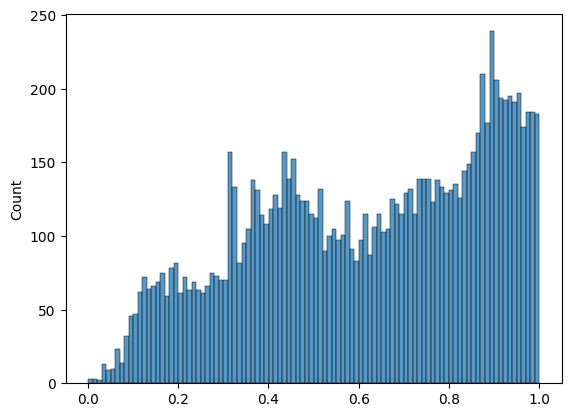

In [4]:
fdr = fdrcorrection(ps, alpha=0.05)
import seaborn as sns
sns.histplot(ps, bins=100)